<a href="https://colab.research.google.com/github/RichardRosenblat/alura-estatistica-com-python-parte-2/blob/main/Curso_de_Estat%C3%ADstica_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# <font color=green>2 DISTRIBUIÇÕES DE PROBABILIDADE</font>
***

## <font color=red>Problema</font>
***

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** (Problema 1) e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo** (Problema 2).

## <font color=green>2.1 Distribuição Binomial</font>
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$\binom{n}{k}$ = combinação $n$ $k$ a $k$ <font color=red> mais detalhes sobre combinação abaixo</font>

$p$ = probabilidade de sucesso em um unico evento, sendo $1 > p > 0$

$q = (1 - p)$ = probabilidade de fracasso, em um unico evento

$n$ = número de eventos estudados

$k$ = número de eventos necessários que tenham sucesso

### Experimento Binomial

1. **Realização de $n$ ensaios idênticos**, ou seja, nada muda entre eles, por exemplo, no caso de jogar um dado, o tipo de dado deve sempre ser o mesmo

2. **Os ensaios são independentes**, ou seja, no exemplo de respostas de uma prova, o estudante não pode mudar o resultado que iria marcar levando outros resultados em consideração

3. **Somente dois resultados são possíveis**, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. **Estas probabilidades não se modificam de ensaio para ensaio**. por exemplo, no caso de lançar uma moeda, então a chance de cair cara ou coroa não pode mudar

### Média da distribuição binomial
O uso e o porquê disso vai estar mais adiante

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

### Desvio padrão da distribuição binomial
O uso e o porquê disso vai estar mais adiante

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [ ]:
from scipy.special import comb

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$


Tabém chamamos $C_{k}^{n}$ de **Espaço amostral** ou **$\Omega$** ou **$S$**

### **Espaço amostral** ($\Omega$)

**O espaço amostral ($\Omega$)** é o **conjunto formado por todos os resultados possíveis de um experimento aleatório**. Em outras palavras, é o conjunto formado por todos os pontos amostrais de um experimento. Veja exemplos:

a) O espaço amostral do experimento “cara ou coroa” é o conjunto $S$ = {Cara, Coroa}. Os pontos amostrais desse experimento são os mesmos elementos desse conjunto.

b) O espaço amostral do experimento “lançamento de um dado” é o conjunto $S$ = {1, 2, 3, 4, 5, 6}. Os pontos amostrais desse experimento são 1, 2, 3, 4, 5 e 6.

c) O espaço amostral do experimento "Lançamento de uma moeda duas vezes" é o conjunto $S$ = {(Cara, Coroa), (Cara, Cara), (Coroa, Cara), (Coroa, Coroa)}

## <font color='blue'>Exemplo: Mega Sena</font>

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

A combinação de 60 6 a 6

In [ ]:
combinacoes = comb(60, 6)
combinacoes

50063860.0

In [ ]:
probabilidade = 1 / combinacoes
print('%.78f'% probabilidade)

0.000000019974488583181559601500398826688653652894345214008353650569915771484375


In [ ]:
# Exercicio
combinacoes = comb(25, 20)
combinacoes
probabilidade = 1 / combinacoes

print('Combinacoes: %d' % combinacoes)
print('Probabilidade: %.15f'% probabilidade)

Combinacoes: 53130
Probabilidade: 0.000018821757952


## <font color='blue'>Exemplo: Concurso para cientista de dados</font>

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** (Problema 1) e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo** (Problema 2).

Relembrando: 
# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:


$p$ = probabilidade de sucesso em um unico evento, sendo $1 \ge p \ge 0$

$q = (1 - p)$ = probabilidade de fracasso, em um unico evento

$n$ = número de eventos estudados

$k$ = número de eventos necessários que tenham sucesso

$\binom{n}{k}$ = combinação $n$ $k$ a $k$

### Qual o número de ensaios ($n$)?

In [ ]:
# As 10 questões
n = 10 
n

10

### Os ensaios são independentes?

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

### Somente dois resultados são possíveis em cada ensaio?

Sim. Mesmo cada questão tendo 3 respostas, a candidato tem duas possibilidades, ACERTA ou ERRAR uma questão. 

### Qual a probabilidade de sucesso ($p$)?

In [ ]:
numero_alternativas_por_questao = 3
p = 1/numero_alternativas_por_questao
p

0.3333333333333333

### Qual a probabilidade de fracasso ($q$)?

In [ ]:
q = 1 - p
q

0.6666666666666667

### Qual o total de eventos que se deseja obter sucesso ($k$)?

In [ ]:
k = 5
k

5

### Solução 1

In [ ]:
probabilidade = comb(n, k) * (p**k) * (q**(n-k))
print("%.8f" % probabilidade)
print('Ou')
print("%.2f%%" % (probabilidade*100))

0.13656455
Ou
13.66%


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [ ]:
# formulas relating to binomial discrete random variables
from scipy.stats import binom

### Solução 2

In [ ]:
eventos_para_sucesso = k
numero_de_eventos = n
chance_sucesso_evento_unico = p

# Probability mass function of a binomial distribuition
probabilidade = binom.pmf(
  eventos_para_sucesso,
  numero_de_eventos,
  chance_sucesso_evento_unico
)
print("%.8f" % probabilidade)
print('Ou')
print("%.2f%%" % (probabilidade*100))

0.13656455
Ou
13.66%


### Obter a probabilidade do candidato passar
Ou seja, acertar 5, 6, 7, 8, 9 ou 10 perguntas  
Em outras palavras acertar no mínimo, 5 perguntas

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [ ]:
binom.pmf(5, n, p) + \
binom.pmf(6, n, p) + \
binom.pmf(7, n, p) + \
binom.pmf(8, n, p) + \
binom.pmf(9, n, p) + \
binom.pmf(10, n, p)

0.21312808006909492

In [ ]:
# Aceita listas, e devolve uma lista com os resultados em ordem
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

0.21312808006909492

In [ ]:
# mesma coisa que binom.pmf([0, 1, 2, 3, 4], n, p).sum()
# Cumulative distribution function
binom.cdf(4, n, p)

0.7868719199309048

Queremos a chance do candidato acertar uma quantidade $> 4$ para isso vamos
seguir a lógica abaixo  

Quando calculamos o cdf usando a quantidade de maxima de sucessos sendo igual a quantidade de eventos ($k = n$  nesse caso é $k = n = 10$) sempre obtemos 1.0 como resultado, já que a chance é de 100% de conseguir um valor dentro de todas as possibilidades  

$$binom.cdf(n, n, p) = 1.0$$

Então podemos concluir que:  
$$binom.cdf(4, n, p) + x = 1.0$$

Então isso significa que:  
$$1.0 - binom.cdf(4, n, p) = x$$

Ou seja, o que queremos é:   

**Definir a quantidade maxima de sucessos que considerariamos como fracasso.**  

Nesse exemplo, a quantidade maxima de questões que o candidato pode acertar, 
e ainda sim não passar para a proxima etapa

Então com os calculos acima conseguimos a soma das seguintes pmf:
$$ S = [k+1, k+2, ...n]$$

In [ ]:
# para uma quantidade maior que 4
# mesma coisa que binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()
1.0 - binom.cdf(4, n, p)

0.21312808006909523

In [ ]:
# Mesma coisa que 1.0 - binom.cdf(4, n, p), porém é mais preciso
# Survival function
binom.sf(4, n, p)

0.21312808006909525

### Exercicio 1

Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes

In [ ]:
# Total de sucessos (vezes que queremos ter faces COROA voltada para cima)
# k
eventos_para_sucesso = 2 

# Total de lançamentos
# n
numero_de_eventos = 4

# Probabilidade de sair COROA em uma unica moeda
# p
chance_sucesso_evento_unico = 1 / 2  

binom.pmf(eventos_para_sucesso, numero_de_eventos, chance_sucesso_evento_unico)

0.375

### Exercicio 2

Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [ ]:
# A quantidade maxima de sucessos para considerarmos os lançamentos uma falha
max_sucessos_para_falha = 2

# Total de lançamentos
# n
numero_de_eventos = 10

# Probabilidade de sair o número 5 em um dado
# p
chance_sucesso_evento_unico = 1 / 6

# 0.22477320212874055
probabilidade = binom.sf(
  max_sucessos_para_falha, 
  numero_de_eventos, 
  chance_sucesso_evento_unico
)

print("{0:.2%}".format(probabilidade))

22.48%


## <font color='blue'>Exemplo: Gincana</font>

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

O que a questão quer saber é:

Em média, quantas equipes das 30 devem ser formadas por 8 mulheres e 4 homens  

Então, os nossos passos são:  
1. A probabilidade de uma equipe de ser formada por 8 mulheres e 4 homens
2. Calcular a quantidade média entre todas as 30 equipes de serem formadas por 8 mulheres


### Solução

In [ ]:
# Probabilidade de sucesso
# chance de um participante ser mulher
p = 0.6
p

0.6

In [ ]:
# Total de eventos
# total de pessoas em uma equipe
n = 12
n

12

In [ ]:
# Eventos sucedidos para sucesso
# quantidade de mulheres esperadas em uma equipe
k = 8
k

8

In [ ]:
probabilidade = binom.pmf(k, n, p)
print("%.8f" % probabilidade)

0.21284094


Agora, utilizaremos a média, para calcular a quantidade média entre todas as 30 equipes de serem formadas pelas 8 mulheres
$$\mu = n \times p$$
ou seja
$$\mu = 30 \times 0.21284094$$

In [ ]:
equipes = 30 * probabilidade 
print("%.8f" % equipes)
# 6.38522819 equipes em média vão ser formadas por 8 mulheres e 4 homens

6.38522819


## Exercício 1
Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [ ]:
p = 0.22
k = 2
n = 3
probabilidade = binom.pmf(k, n, p)
filhos = 50 * probabilidade 

print("%.8f" % filhos)

5.66280000


---
---

## <font color=red>Problema</font>
***

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

## <font color=green>2.2 Distribuição Poisson</font>
***

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos ocorrências, mas a não possibilidade de contagem das não ocorrências.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de ocorrências no intervalo desejado

### Experimento Poisson

1. **A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.** No exemplo de buracos em uma estrada, a probabilidade de ter buracos por toda a estrada deve ser a mesma

2. **O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.** No exemplo de buracos em uma estrada, a probabilidades de buracos não pode diminuir dependendo de quantos outros buracos existem em outra parte da estrada

3. **A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.** No exemplo de buracos em uma estrada, a chance de haver 100 buracos em um dado 1 km de estrada deve ser a mesma de ocorrer em qualquer outro 1 km

### Média da distribuição Poisson

# $$\mu$$

### Desvio padrão da distribuição Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [ ]:
import numpy as np

In [ ]:
np.e

2.718281828459045

## <font color='blue'>Exemplo: Delivery</font>

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

### Qual o número médio de ocorrências por hora ($\mu$)?

In [ ]:
media = 20
media

20

### Qual o número de ocorrências que queremos obter no período ($k$)?

In [ ]:
eventos = 15
eventos

15

### Solução 1
#### $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$
Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de ocorrências no intervalo desejado

In [ ]:
probabilidade = ((np.e**(-media))*((media)**eventos))/ np.math.factorial(eventos)
print("%.8f" % probabilidade)

0.05164885


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [ ]:
from scipy.stats import poisson

### Solução 2

In [ ]:
probabilidade = poisson.pmf(eventos, media)
print("%.8f" % probabilidade)

0.05164885


### Exercício 
O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.



In [ ]:
media = 20
k = 25

probabilidade = poisson.pmf(k, media)
print("{0:.2%}".format(probabilidade))

4.46%


## Poisson vs Binomial
**A distribuição Binomial** nos permite encontrar a chance de uma quantidade especifica de eventos obterem "sucesso" dentro de uma sequencia de eventos em dentro de um periodo/espaço definido/limitado

**A distribuição Poisson** nos permite encontrar a chance de uma contagem de eventos específica ocorrerem em um período/espaço aleatório, tendo apenas a média desses eventos dentro de um período/espaço indefinido/ilimitado

Utilizamos a **distribuição Binomial** para contabilizar eventos boleanos(sucessos/falhas) em sequencias de espaço ou tempo discretos, ou seja, limitados

Utilizamos a **distribuição Poisson** para contabilizar eventos em sequencias de espaço ou tempo discretos e aleatórios, ou seja, indefinidos ou ilimitados

---
---

## <font color=red>Problema</font>
***

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

## <font color=green>2.3 Distribuição Normal</font>
***

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%, ou seja, a chance de qualquer valor de $x$ de existir sob a curva é sempre 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$. Ou seja, nunca vai existir o 0 exemplos de qualquer valor de $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão. A Localização e a Largura da curva, respectivamente; 

7. **A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior**, ou seja, a integral definida utilizando os limites superiores e inferiores, sendo assim a chance de um valor existir dentro da curva depende de quão proximo da média os limites são e o tamanho da diferença entre eles.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior



### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

### Construindo tabela normal padronizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

Algumas tabelas podem fornecer a área sob a curva entre a média ($\mu$) e $Z$, nesses casos, para chegar nos valores das tabelas acima, é apenas somar $0.5$

A tabela acima utiliza a CDF (cumulative distribuition function) para calcular a de um ponto que escolhermos ($Z$) de estar na area de uma curva que vai de $-\infty$ até $Z$

A $\mu$ padrão da CDF é 0 e a $\sigma$ padrão é 1

$Z$ é apenas uma ferramenta para nos mostrar quanto sd (standard deviation points) estamos da média, então podemos utlizar-lo para calcular a probabilidade, sendo um valor positivo significa que $X$ é maior que a média

A tabela toda representa apenas um valor, as linhas são somadas com as colunas, ou seja, a linha 3.10 na coluna 0.02 é igual à distancia $Z = 3.12$ 

O valor de $Z$ chega a 1 pois estamos colocando valores arredondados, então consideraremos como 1 um valor maior que 0.9999, mesmo sendo impossível chegar a 100% já que a curva é infinita

Esse valor chega tão próximo a 1 tão rápido devida à distribuição padrão ser pequena

## <font color='blue'>Exemplo: Qual sua altura?</font>

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

### Obter a variável padronizada $Z$

In [ ]:
media = 1.7
media

1.7

In [ ]:
desvio_padrao = 0.1
desvio_padrao

0.1

In [ ]:
Z = (1.8 - media)/ desvio_padrao
Z

1.0000000000000009

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = 0.8413 # Da tabela
probabilidade

0.8413

### Solução 2 - Utilizando Scipy

In [ ]:
from scipy.stats import norm
norm.cdf(Z)

0.8413447460685431

In [ ]:
norm.cdf(1.8, loc=media, scale=desvio_padrao)

0.8413447460685431

#### Exercicio
A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [ ]:
z_score = (85 - 70)/5

print("{0:.2%}".format(norm.cdf(z_score)))

99.87%


### Problema B - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

Como a distancia entre 1.60 e a média é igual á distancia entre 1.80 e a média, e a curva é simétrica na média podemos concluir que a area de 1.60 até 1.80 é igual a a área de 16 até a média vezes 2

Então podemos calcular isso calculando a distancia entre $-∞$ e 1.80 menos 0.5 (a area até a média) e multiplicamos o resultado por 2

Também podemos descobrir a área entre $-∞$ e 1.80 e subitrair pela area de $-∞$ e 1.60

### Obter a variável padronizada $Z$

In [ ]:
Z = (1.7 - media)/ desvio_padrao
Z 

0.0

In [ ]:
Z = (1.8 - media)/ desvio_padrao
Z 

1.0000000000000009

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = 0.8413
probabilidade # de infinito até 1.80

0.8413

In [ ]:
probabilidade = probabilidade - 0.5
probabilidade # Area da média até a 1.80

0.34130000000000005

In [ ]:
probabilidade = probabilidade*2
probabilidade #1.60 a 1.80

0.6826000000000001

### Solução 2 - Utilizando Scipy

In [ ]:
Z_superior = round((1.8 - media)/ desvio_padrao, 2)
Z_inferior = round((1.6 - media)/ desvio_padrao, 2)
print(Z_superior, Z_inferior)

1.0 -1.0


In [ ]:
# Esse é o melhor jeito, o outro jeito não é tão bom e é só valido para 
# esse tipo de caso em especifico, onde a distancia de ambos para a média
# é igual
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370859

In [ ]:
# Isso também funciona pois ambas as áreas são iguais 
# norm.cdf(Z_superior) é de -inifinito até 1.80, e o restantante é 1-norm.cdf(Z_superior)
# e já que a area dos dois são iguais, o restante para 1 é igual, então eu só removo
# a mesma quantidade de area que falta para Z_superior para chegar a 1
# de Z_superior, assim tirando a parte da esqueirda da area
probabilidade = norm.cdf(Z_superior) - (1-norm.cdf(Z_superior))
probabilidade

0.6826894921370859

#### Exercicio
O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R\$ 300,00 e desvio padrão igual a R\$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre R\$ 250,00 e R\$ 350,00

2) Entre R\$ 400,00 e R\$ 500,00

In [ ]:
resposta_1 = norm.cdf(350, loc=300, scale=50)-norm.cdf(250, loc=300, scale=50)
resposta_2 = norm.cdf(500, loc=300, scale=50)-norm.cdf(400, loc=300, scale=50)

print("{0:0.2%}".format(resposta_1))
print("{0:0.2%}".format(resposta_2))

68.27%
2.27%


### Problema C - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

### Obter a variável padronizada $Z$

In [ ]:
# Distancia de 1.90 para a média em unidades de desvio padrão
Z = (1.9 - media)/ desvio_padrao
Z 

1.9999999999999996

### Solução 1 - Utilizando tabela

In [ ]:
# Usamos 1 - Z já que o que queremos é o restante da area de -infinito para 1.90
probabilidade = 1- 0.9767
probabilidade

0.023299999999999987

### Solução 2 - Utilizando Scipy

In [ ]:
# Novamente, esse método é mais preciso que a tabela
probabilidade = 1 - norm.cdf(Z)
probabilidade

0.02275013194817921

In [ ]:
# ISSO FUNCIONA APENAS SE UTILIZARMOS O Z!!!!!!
# Já que a curva é normal é sempre simétrica,
# podemos simplemente pegar o valor que fica exatamente
# oposto na curva ao valor que queremos, e então calcular a area entre
# -infinito e o valor oposto ao que queremos
# Sendo a mesma coisa que 1 - norm.cdf(Z)
probabilidade = norm.cdf(-Z)
probabilidade

0.022750131948179216

## Exercícios

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [ ]:
resposta_1 = norm.cdf(750, loc=720, scale=30) - norm.cdf(650, loc=720, scale=30)
resposta_2 = 1 - norm.cdf(800, loc=720, scale=30)
resposta_3 = norm.cdf(700, loc=720, scale=30) 

print("1) {0:0.2%}".format(resposta_1))
print("2) {0:0.2%}".format(resposta_2))
print("3) {0:0.2%}".format(resposta_3))


1) 83.15%
2) 0.38%
3) 25.25%


Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [ ]:
resposta_1 = norm.cdf(1.96)
# mesma coisa que norm.cdf(-2.15)
resposta_2 = norm.sf(2.15)
resposta_3 = norm.cdf(-0.78)
# mesma coisa que norm.cdf(-0.59)
resposta_4 = norm.sf(0.59)

print("1) {0:0.4f}".format(resposta_1))
print("2) {0:0.4f}".format(resposta_2))
print("3) {0:0.4f}".format(resposta_3))
print("4) {0:0.4f}".format(resposta_4))


1) 0.9750
2) 0.0158
3) 0.2177
4) 0.2776


# <font color=green>3 AMOSTRAGEM</font>
***

## <font color=green>3.1 População e Amostra</font>
***

### População
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas).

### Populações finitas

Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.

### Populações infinitas

Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

<font color=red>Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.</font>.

### Amostra
Subconjunto representativo da população. Uma população não adianta nada se ela não for representativa. Po isso é necessário utilizar as tecnicas certas para obte-las, tendo o tamanho correto e etc

Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras.

## <font color=green>3.2 Quando utilizar uma amostra?</font>
***

### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

### Custos elevados

Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

## <font color=green>3.3 Amostragem Aleatória Simples</font>
***

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemento da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.

Uma boa amostra aleatória simples, vai ter parâmetros próximos (Com uma margem de erro) dos da população.

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
# 76840 registros ou 76840 observações
dados.shape[0]

76840

In [ ]:
dados['Renda'].mean()

2000.3831988547631

In [ ]:
# Nesse caso, consideramos que Dados é a população de onde retiramos nossa amostra
# Como não utiilzamos critério nenhum para definir o tamanho da amostra, não
# podemos garantir que ela é representativa
amostra = dados.sample(n=1000, random_state=101)
amostra.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
29042,29,0,39,8,5,480,1.719128
62672,43,0,55,2,6,250,1.639205
29973,29,1,36,2,12,788,1.654122
22428,26,0,46,8,8,1680,1.622450
55145,41,0,37,2,9,2500,1.625268


In [ ]:
amostra.shape[0]

1000

In [ ]:
amostra['Renda'].mean()

1998.783

In [ ]:
dados['Sexo'].value_counts(normalize = True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
amostra['Sexo'].value_counts(normalize = True)*100

0    70.6
1    29.4
Name: Sexo, dtype: float64

## <font color=green>3.4 Amostragem Estratificada</font>
***

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

Por exemplo, separaremos a População em classes de renda, como classe A, B, C, D, e E, e dentro de cada uma selecionaremos uma Amostra Aleatória Simples.
Ou seja cada indivíduo tem variáveis próximas dos outros indivíduos na mesma classe

## <font color=green>3.5 Amostragem por Conglomerados</font>
***

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

# <font color=green>4 ESTIMAÇÃO</font>
***

## <font color='red'>Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## <font color=green>4.1 Teorema do limite central</font>
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais (**a média de uma amostra é *uma* média amostral**) se aproxima de uma distribuição normal (Fazendo um histograma com a média de várias amostras) com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

# $$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

onde:  
$\sigma_{\bar{x}} =$ desvio padrão das médias amostrais.  
$\sigma =$ desvio padrão da população total.  
$n =$ tamanho das amostras.  

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**  
Quão maior $n$ menor será $\sigma_{\bar{x}}$

### Entendendo o Teorema do Limite Central

In [ ]:
n = 2000 # Tamanho das amostras
total_de_amostras = 1500 # Quantidade total de amostras

In [ ]:
amostras = pd.DataFrame()
amostras

""


In [ ]:
# Iteramos pelo total de amostras
for i in range(total_de_amostras):
  # Pegamos uma amostra da idade, de tamanho n, dos dados; No formato de uma series
  _ = dados['Idade'].sample(n)
  # resetamos os indices
  _.index = range(0, len(_))
  # adicionamos no dataframe de amostras, com o nome de Amostra_ seguido do numero da iteração
  amostras['Amostra_' + str(i)] = _
amostras

<ipython-input-69-ebf473a949c3>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,62,28,41,43,31,42,32,51,29,51,...,47,46,25,48,37,48,50,50,55,33
1,75,43,30,50,50,50,44,40,68,59,...,50,24,40,45,41,39,21,45,41,60
2,58,34,29,35,41,50,39,78,27,48,...,60,64,22,50,47,34,33,36,57,60
3,28,30,62,34,22,32,52,34,29,51,...,42,60,38,28,64,46,49,25,59,68
4,43,44,50,32,47,48,30,63,62,35,...,47,52,42,63,37,39,36,48,47,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,36,46,31,43,54,39,61,52,60,30,...,32,41,53,53,57,53,43,52,37,51
1996,43,65,46,26,56,51,29,50,34,29,...,33,41,55,24,28,38,23,27,39,33
1997,41,43,39,63,43,34,35,19,40,48,...,49,55,38,53,45,20,47,35,50,37
1998,64,54,39,53,27,46,27,49,36,40,...,25,27,35,50,55,46,30,20,39,25


In [ ]:
# De acordo com o Teorema do Limite central, essa series deve se aproximar de
# uma distribuição normal

# Essa é a series de médias amostrais!
amostras.mean()

Amostra_0       44.0315
Amostra_1       43.6560
Amostra_2       44.1035
Amostra_3       44.5550
Amostra_4       43.9115
                 ...   
Amostra_1495    43.5845
Amostra_1496    44.5625
Amostra_1497    43.7260
Amostra_1498    43.7510
Amostra_1499    43.9090
Length: 1500, dtype: float64

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

<AxesSubplot:>

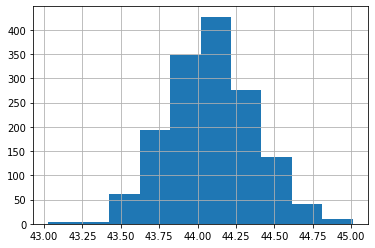

In [ ]:
# é isso ai, veja que ela se aproxima de uma curva de sino!
amostras.mean().hist()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [ ]:
# A média da População
dados['Idade'].mean()

44.07142113482561

In [ ]:
# A média das médias amostrais, 
amostras.mean().mean()

44.08528733333333

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

onde:  
$\sigma_{\bar{x}} =$ desvio padrão da série de médias amostrais (erro padrão da média.)  
$\sigma =$ desvio padrão da população total.  
$n =$ tamanho das amostras.  


In [ ]:
# Desvio padrão das médias amostrais
# Chamamos isso de erro padrão da média
amostras.mean().std()

0.28003200124396976

In [ ]:
dados['Idade'].std()

12.48058346535974

In [ ]:
# 12.48/sqrt(2000) é igual ao desvio padrão das médias amostrais
# a unica diferênça é que dessa forma temos mais precisão
dados['Idade'].std()/np.sqrt(n)

0.27907433027404266

## <font color=green>4.2 Níveis de confiança e significância</font>
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

**Representa a chance da média populacional que calcularmos estar errada**

O **nível de confiança** é um valor escolhido para representar o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

Ou seja:

Nível de **confiança:** Chance da pesquisa estar **correta.**   
Nível de **significância:** Chance da pesquisa estar **errada.**  

Ambos são opostos.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)


A area entre $-Z$ e $Z$ é igual a $1-\alpha$ **(Nível de confiança)**, ou seja, o restante é igual a $\alpha$ **(Nível de significância)** e já que existem duas partes iguais onde essa área fica (já que a curva é simétrica), podemos afirmar que **cada uma** é igual a $\alpha/2$

## <font color=green>4.3 Erro inferencial</font>
***

O **erro inferencial** é definido pelo **erro padrão da média (desvio padrão das médias amostrais)** $(\sigma_{\bar{x}})$ multiplicadovalor **absoluto de Z onde a area entre -z e +z é igual a 1-$\alpha$** determinado para o processo.

**Representa o quanto nossa média populacional pode variar para mais e para menos**
Ou seja um erro inferencial de 5 significa que a média populacional que calculamos pode variar entre a media verdadeira + 5 e a média verdadeira - 5

# $$ e =  z  \cdot \sigma_{\bar{x}}$$ 


onde:  
$e =$ erro inferencial  
$z =$ valor absoluto de Z onde a area entre -z e +z é igual a 1-$\alpha$    
$\sigma_{\bar{x}} = $ desvio padrão da série de médias amostrais (erro padrão da média )

## <font color=green>4.4 Intervalos de confiança</font>
***

### Intevalo de confiança para a média da população

**nos dá 2 valores que definem um intervalo, a média populacional tem uma probabilidade igual ao nivel de confiança de se encontrar entre esses valores** 

ou seja se os limites são -54 e 54 com um nivel de confiança de 95%, a média tem 95% de chance de estar entre -54 e 54

## $$\mu = \bar{x} \pm e$$

onde:  
$\mu =$ limites do intervalo de confiança para a média populacional  
$\bar{x} =$ média amostral de uma amostra qualquer  
$e =$ erro inferencial  

Caso não o desvio padrão populacional não seja conhecido, podemos trocar ele pelo desvio padrão da própria amostra quando formos calcular $\sigma_{\bar{x}}$

## Resumão dessa parte
### Erro padrão da média
# $$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

onde:  
$\sigma_{\bar{x}} =$ erro padrão da média.(desvio padrão da série de médias amostrais)   
$\sigma =$ desvio padrão da população total.  
$n =$ tamanho das amostras.  

---
### Erro inferencial
# $$ e =  z  \cdot \sigma_{\bar{x}}$$ 


onde:  
$e =$ erro inferencial (valor que mostra o quanto podemos errar da média populacional verdadeira)  
$z =$ valor absoluto de Z onde a area de -z e +z é igual a 1-$\alpha$  
$\sigma_{\bar{x}} = $ desvio padrão da série de médias amostrais (erro padrão da média )  

---
### Intervalo de confiança
## $$\mu = \bar{x} \pm e$$

onde:  
$\mu =$ limites onde média populacional pode estar (probabilidade igual ao nivel de confiança)   
$\bar{x} =$ média amostral de uma amostra qualquer  
$e =$ erro inferencial  



## <font color='blue'>Exemplo: </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. **Construa um intervalo de confiança** para a **média populacional** assumindo um **nível de significância de 5%**.

### Média amostral ($\bar{x}$)

In [ ]:
# Peso médio da amostra aleatória de 20 sacos
media_amostral = 5050
media_amostral

5050

### Nível de significância ($\alpha$)

In [ ]:
# Nível de significancia de 5% (chance da operação estar errada)
alpha = 0.05
alpha

0.05

### Nível de confiança ($1 - \alpha$)

In [ ]:
# Nível de confiança (chance da operação estar correta) de 95%
nivel_confianca = 1-alpha
nivel_confianca

0.95

### Obtendo $z$

In [ ]:
# Pra referencia futura
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [ ]:
# A area de 1-alpha é 95%
# Queremos o |Z|
# Então pra cada valor absoluto de Z (|z|) é a metade disso
# já que é simetrico em torno da média
0.95/2

0.475

In [ ]:
# Então a area de de -infinito para +Z é igual a 0.5(infinito até a média) + |Z|
0.475+0.5

0.975

In [ ]:
# Uma outra forma, de chegar na area (porcentagem) de -infinito para +z é
# Já que sabemos que falta metade de alpha para Z chegar a 1, 
# então apenas subtraimos isso da area total
porcentagem_infinito_para_z = 1-(alpha/2)
porcentagem_infinito_para_z

0.975

In [ ]:
# vendo na tabela, sabemos a porcentagem, e calculamos o Z com base na 
# coordenadas da porcentagem na tabela
# Já que é simétrico, o outro valor de
1.9 + 0.06

1.96

In [ ]:
# Usamos o scipy, damos a porcentagem e recebemos o |Z|
z = norm.ppf(porcentagem_infinito_para_z)
norm.ppf(porcentagem_infinito_para_z)

1.959963984540054

## Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_{\bar{x}}$

In [ ]:
# nos foi dado no texto
desvio_padrao_populacional = 150
desvio_padrao_populacional

150

In [ ]:
# tamanho da amostra
n = 20
n

20

In [ ]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [ ]:
# desvio padrão da série de médias amostrais
sigma_x_barra = desvio_padrao_populacional/raiz_de_n
sigma_x_barra

33.54101966249684

### Obtendo $e$

In [ ]:
# Erro inferencial
e = z * sigma_x_barra
e

65.73919054324361

### Solução 1 - Calculando o intervalo de confiança para a média

In [ ]:
limite_inf = media_amostral-e
limite_sup = media_amostral+e
intervalo = (limite_inf,limite_sup)

# como o nivel de confiança é 95% temos a chance de 95% da média estar entre estes 2 valores
intervalo

(4984.260809456757, 5115.739190543243)

### Solução 2 - Calculando o intervalo de confiança para a média

In [ ]:
norm.interval(
  confidence=1-alpha, # nível de confiança
  loc=media_amostral, # média da amostra
  scale=sigma_x_barra # desvio padrão da serie de medias amostrais
)

# como o nivel de confiança é 95% temos a chance de 95% da média estar entre estes 2 valores


(4984.260809456757, 5115.739190543243)

## Exercício

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [ ]:
# desvio padrao populacional dividido pela raiz do tamanho da amostra
desvio_padrao_medias_amostrais = 6/np.sqrt(50)
# 1 - (nivel de significancia / 2)
porcentagem_infinito_para_z = 1-((1-0.95)/2)
# Valor de Z necessário para ter a area de porcentagem_infinito_para_z
z = norm.ppf(porcentagem_infinito_para_z)
# Erro inferencial
e = z * desvio_padrao_medias_amostrais

print('sigma_x_barra=',desvio_padrao_medias_amostrais)
print('area_infinito_para_z=',porcentagem_infinito_para_z)
print('z=',z)
print('e=',e)


sigma_x_barra= 0.848528137423857
area_infinito_para_z= 0.975
z= 1.959963984540054
e= 1.6630845892196133


## Exercício

Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [ ]:
# desvio padrão populacional/sqrt(tamanho da amostra)
sigma_x_barra = 11/np.sqrt(1976)
sigma_x_barra

norm.interval(
  confidence=0.9, # nível de confiança
  loc=28, # média da amostra
  scale=sigma_x_barra # desvio padrão da serie de medias amostrais
)


(27.592969951356466, 28.407030048643534)

# <font color=green>5 CÁLCULO DO TAMANHO DA AMOSTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## <font color=green>5.1 Variáveis quantitativas e população infinita</font>
***

para encontrar o tamanho que nossa amostra deve ser para obter certo nível de confiança alteramos esta fórmula

# $$e = z \frac{\sigma}{\sqrt{n}}$$



E apenas a utilizamos para descobrir $n$
#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$n$ = tamanho da amostra para nível de confiança

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### <font color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual **relacionado à média**.

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [ ]:
# igual a 0.5 + (nivel de confiança/2)
area_de_infinito_para_z = 0.5+(0.95/2)
area_de_infinito_para_z

0.975

In [ ]:
# igual a 1 - (nivel de significancia/2)
area_de_infinito_para_z = 1-(0.05/2)
area_de_infinito_para_z

0.975

In [ ]:
# Função oposta a cdf (cdf recebe Z e retorna, area de -infinito até z)
# ppf recebe area de -infinito até z e retorna Z 
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma$

In [ ]:
# desvio padrão populacional dado no texto
sigma = 3323.39
sigma

3323.39

### Obtendo $e$

In [ ]:
# margem de erro dada no texto
e = 100
e

100

### Obtendo $n$

In [ ]:
n = (z*sigma/e)**2
n.round()

4243.0

### Exercicio
O valor do gasto médio dos clientes de uma loja de conveniência é de R\$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

In [ ]:
z = norm.ppf(1-(0.1/2))
sigma = 15
e = 0.1 * 45.5

n = (z*(sigma/e))**2
n.round()

29.0

---
---

## <font color='red'>Problema</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

## <font color=green>5.2 Variáveis quantitativas e população finita</font>
***

#### Com desvio padrão populacional conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão populacional desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$n$ = tamanho da amostra para nível de confiança

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## <font color='blue'>Exemplo: Indústria de refrigerantes</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [ ]:
# Quantidade de latas dada no texto
N = 10000
N

10000

### Obtendo $z$

In [ ]:
# Calculado a partir de nivel de confiança
area_para_z = 0.5+(0.95/2)
z = norm.ppf(area_para_z)
z

1.959963984540054

### Obtendo $s$

In [ ]:
# desvio padrão amostral dado no texto
s = 12
s

12

### Obtendo $e$

In [ ]:
# erro maximo, retirado do texto
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [ ]:
# Atenção aos parenteses
n =  ( (z**2) * (s**2) * (N) ) / (((z**2) * (s**2)) + ((e**2) * (N-1)))
n.round()

22.0

## Exercício
Um fabricante de farinha verificou que, em uma **amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos**, apresentou um **desvio padrão amostral do peso igual a 480 g**.

Considerando um **erro máximo associado à média populacional igual a 0,3 kg** e um **nível de confiança igual a 95%**, **qual tamanho de amostra** deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [ ]:
# calculado a partir de nivel de confiança
z = norm.ppf(0.5+(0.95/2))
# desvio padrão amostral
s = 480
# tamanho populacional
N = 2000
# margem de erro 
# ALTERADO PARA ESTAR NA MESMA UNIDADE DE MEDIDA QUE A O DESVIO PADRÃO
e = 0.3 * 1000

n =  ( (z**2) * (s**2) * (N) ) / (((z**2) * (s**2)) + ((e**2) * (N-1)))
n.round()

10.0

# <font color=green>6 FIXANDO O CONTEÚDO</font>
***

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Construindo o dataset conforme especificado pelo problema

In [ ]:
renda_5000 = dados.query('Renda <= 5000')['Renda']

In [ ]:
sigma = renda_5000.std()
sigma

1082.7945490306845

In [ ]:
media = renda_5000.mean()
media

1426.5372144947232

### Calculando o tamanho da amostra

In [ ]:
z = norm.ppf(0.5+0.95/2)
e = 10

In [ ]:
n = (z*(sigma/e))**2
n.round()

45039.0

### Calculando o intervalo de confiança para a média

In [ ]:
interval = (media-e, media+e)

In [ ]:
sigma_x_barra = sigma/np.sqrt(n)
sigma_x_barra

interval = norm.interval(
  confidence=0.95, 
  loc=media, 
  scale=sigma_x_barra 
)
interval

(1416.5372144947232, 1436.5372144947232)

### Realizando uma prova gráfica

In [ ]:
renda_5000 = dados.query('Renda <= 5000').Renda
sigma = renda_5000.std()
media = renda_5000.mean()
z = norm.ppf(.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())
intervalo = norm.interval(confidence = 0.95, loc = media, scale = sigma / np.sqrt(n))

<AxesSubplot:>

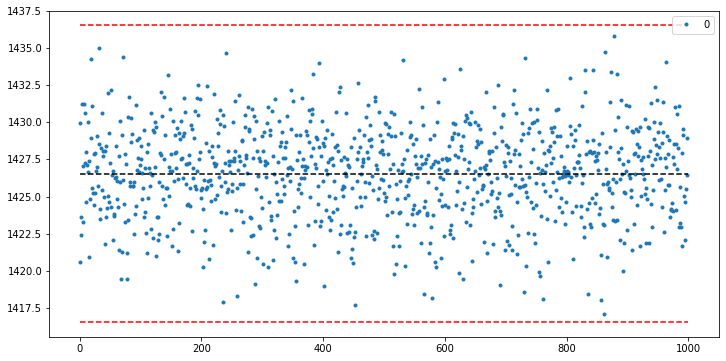

In [ ]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax